# <center> Seoul Bike Sharing Demand Analysis Project </center>

### <center>Lab of Information Systems and Analytics</center>

##### <center>Carlo Alberto Sartori</center>
##### <center>Matricula 894176</center>

## Initial Setup and Import of Libraries

In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import datetime
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

## Data loading and cleaning

First, we upload the choosen dataset 

In [6]:
df = pd.read_csv("SeoulBikeData.csv", encoding='ISO-8859-1')

Preview of the dataset

In [4]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


Then we check the dataset shape

In [300]:
print('The dataset has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

The dataset has 8760 rows and 14 columns.


And we get information about the dataset (data types, number of non-null values, etc.)

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

I can see that there are no missing values. This fact is confirmed by the following result:

In [302]:
print("NaN values of the dataset:", df.isnull().sum().max())

NaN values of the dataset: 0


Now I convert date columns to datetime for a easier manipulation

In [303]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


To have a final overview after the cleaning i want to see the description of the dataset (mean, standard deviation, quartiles, etc.)

In [304]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Date,8760,2018-06-01 00:00:00,2017-01-12 00:00:00,2018-03-04 00:00:00,2018-06-06 00:00:00,2018-09-08 00:00:00,2018-12-11 00:00:00,NaN
Rented Bike Count,8760.0,704.602055,0.0,191.0,504.5,1065.25,3556.0,644.997468
Hour,8760.0,11.5,0.0,5.75,11.5,17.25,23.0,6.922582
Temperature(°C),8760.0,12.882922,-17.8,3.5,13.7,22.5,39.4,11.944825
Humidity(%),8760.0,58.226256,0.0,42.0,57.0,74.0,98.0,20.362413
Wind speed (m/s),8760.0,1.724909,0.0,0.9,1.5,2.3,7.4,1.0363
Visibility (10m),8760.0,1436.825799,27.0,940.0,1698.0,2000.0,2000.0,608.298712
Dew point temperature(°C),8760.0,4.073813,-30.6,-4.7,5.1,14.8,27.2,13.060369
Solar Radiation (MJ/m2),8760.0,0.569111,0.0,0.0,0.01,0.93,3.52,0.868746
Rainfall(mm),8760.0,0.148687,0.0,0.0,0.0,0.0,35.0,1.128193


## Exploratory data analysis
At this stage I want to better understand the data we are going to handle. 

I will now do a correlation analysis between the various data, identifying the relationships between the variables. For example, I try to understand how much weather conditions (such as temperature or humidity) affect the number of bicycles rented.

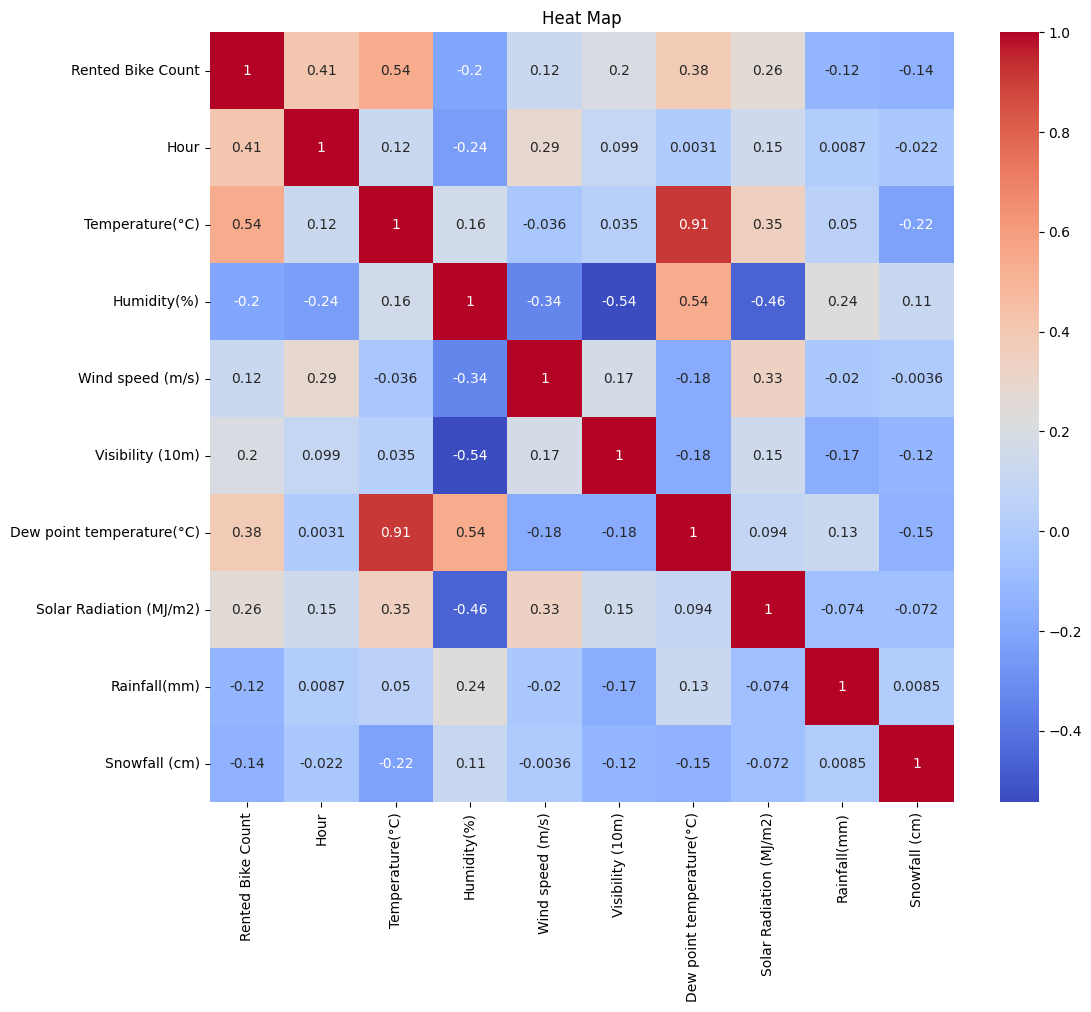

In [305]:
# I consider only the numeric columns for the correlation matrix
numeric_data = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# I visualize the heat map of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heat Map')
plt.show()


We can see that correlation between **Dew point temperature(°C)** and **Temperature(°C)** is very hight. This indicated a strong dependence between the two variables.
In this case we can choose to drop one of them since they provide redundant information. I choose to drop **Dew point temperature(°C)**, since is less useful for my analysis.

In [306]:
df.drop('Dew point temperature(°C)', axis=1, inplace=True)

Now I'll look at the daily distribution of rentals

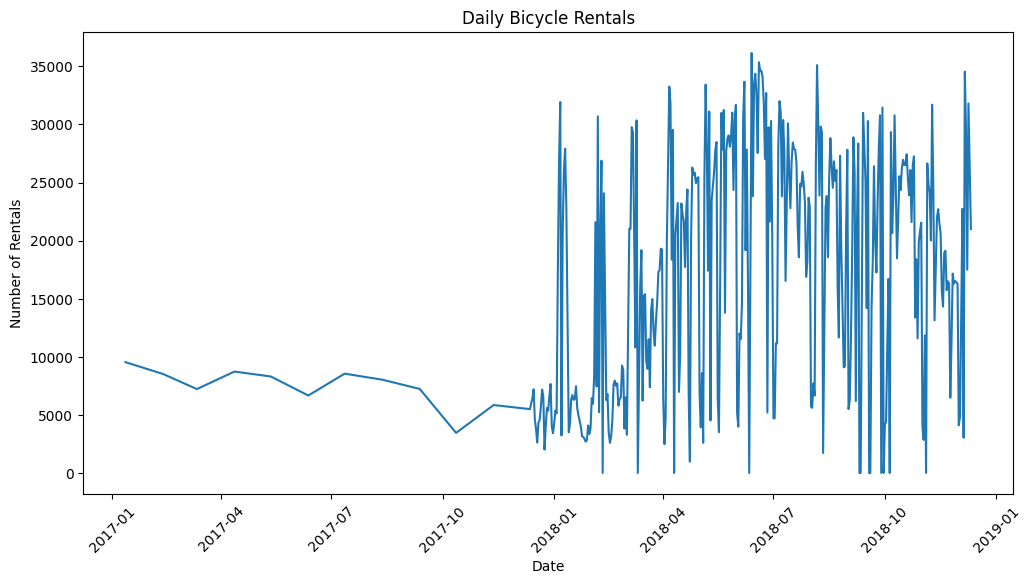

In [307]:
plt.figure(figsize=(12, 6))
plt.plot(df.groupby(df['Date'].dt.date)['Rented Bike Count'].sum())
plt.title('Daily Bicycle Rentals')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=45)
plt.show()


There is a clear seasonal variation in the number of bicycle rentals, with peaks during the warm months and declines during the cold months. This indicates a strong impact of weather or seasonal conditions on bicycle rental demand.

## Data pre-processing

### Investigate the distribution of nominal features
Now I'll investigate the distribution of nominal features to understand if it will influence other data

In [308]:
nominal = 0
ordinal = 0
continuous = 0
discrete = 0

for col in df.columns:
    if df[col].dtype == 'object':
        nominal += 1
    elif df[col].dtype == 'int64':
        discrete += 1
    elif df[col].dtype == 'float64':
        continuous += 1
    else:
        # Added to handle any data types not covered as datetime
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            nominal += 1  
        else:
            ordinal += 1

print('There are {} nominal features, {} ordinal features, {} continuous features and {} discrete features.'.format(nominal, ordinal, continuous, discrete))

There are 4 nominal features, 0 ordinal features, 5 continuous features and 4 discrete features.


In [309]:
# Creating an empty list to store the nominal features
nominal_features = []

print('The nominal features are:')
for i in df.select_dtypes(include=['object']).columns:
    print('-', i)
    nominal_features.append(i)

The nominal features are:
- Seasons
- Holiday
- Functioning Day


The distribution of nominal features

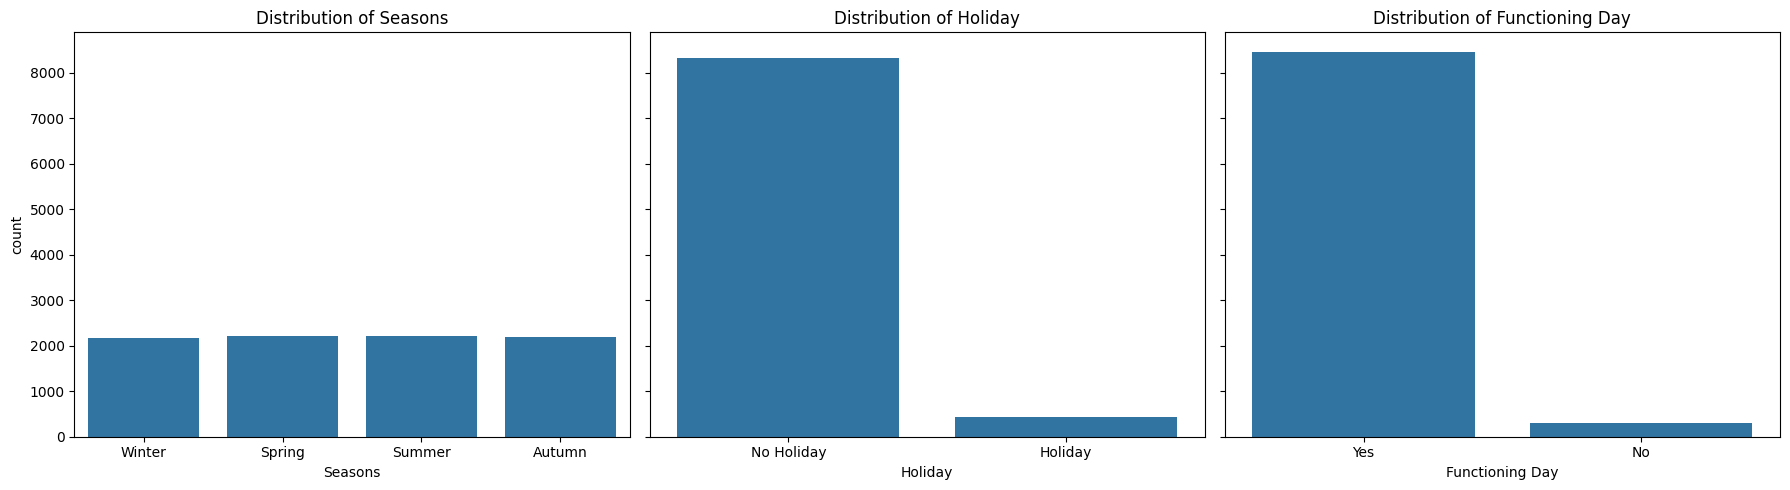

In [310]:
nominal_features = ['Seasons', 'Holiday', 'Functioning Day']
fig, axes = plt.subplots(1, len(nominal_features), figsize=(18, 5), sharey=True)
for i, feature in enumerate(nominal_features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

### One hot encoding of nominal features

Creating the transformer for One Hot Encoding

In [311]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Hour']  

df = df.drop('Date', axis=1)

categorical_features = [col for col in df.columns if df[col].dtype == 'object']

df = pd.get_dummies(df, columns=categorical_features)

X = df.drop('Rented Bike Count', axis=1)
y = df['Rented Bike Count']

## Model training and selection

### Dataset creation

Now I'm going to buid the representation and create all the splits (train/validation/test)

In [312]:
# Division of data into features and targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model training and validation
We now eplore the performance of one model. I've chosen the random forest model for its ability to handle large datasets with many features, minimizing the risk of overfitting typical of Decision Trees and improving overall forecast accuracy. Then I will continue with the training on the training set and the validation.

In [313]:
# Random Forest model creation and training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Now that the model is create let's validate it

In [314]:
# previsions on the test set
predictions = model.predict(X_test)

# valuation of model's performances
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Absolute Error: 139.1577111872146
Mean Squared Error: 54156.82851843607
R² Score: 0.8700172385659842


I use cross validation to test the model

In [315]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-validated R² scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())
print("Standard Deviation CV R²:", cv_scores.std())

Cross-validated R² scores: [0.23751245 0.57590587 0.72418077 0.54311951 0.66784883]
Mean CV R²: 0.5497134861546441
Standard Deviation CV R²: 0.16887498320818


In [316]:
cv_scores = cross_val_score(RandomForestRegressor(n_estimators=100, random_state=42), 
                            X, y, 
                            cv=5,
                            scoring='neg_mean_squared_error')  


mse_scores = -cv_scores
rmse_scores = np.sqrt(mse_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print("Mean RMSE from cross-validation:", mean_rmse)
print("RMSE standard deviation from cross-validation:", std_rmse)

Mean RMSE from cross-validation: 320.7692919926199
RMSE standard deviation from cross-validation: 108.76618017316785


We calculate the training and validation errors by varying the number of estimators in the Random Forest.

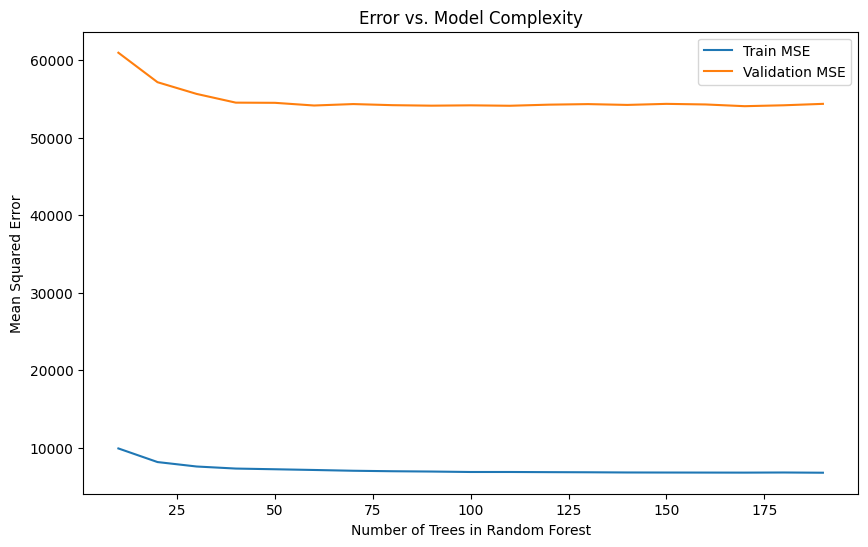

In [317]:
train_errors, val_errors = [], []
n_estimators_range = range(10, 200, 10)

for n_estimators in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    val_predictions = model.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_predictions))
    val_errors.append(mean_squared_error(y_test, val_predictions))

# Visualizzazione del grafico
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_errors, label='Train MSE')
plt.plot(n_estimators_range, val_errors, label='Validation MSE')
plt.legend()
plt.xlabel('Number of Trees in Random Forest')
plt.ylabel('Mean Squared Error')
plt.title('Error vs. Model Complexity')
plt.show()

### Hyperparameter Tuning

I want to get a better result from my model so I  Use grid search method to find the best parameters for your Random Forest model

In [318]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.

Best parameters found:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Feature ranking:
1. Feature Hour (0.25911678010429084)
2. Feature Temperature(°C) (0.19132160400726755)
3. Feature Humidity(%) (0.08718777230148148)
4. Feature Solar Radiation (MJ/m2) (0.08306423012159748)
5. Feature Seasons_Winter (0.07697061269508479)
6. Feature Day (0.04157725084813608)
7. Feature Visibility (10m) (0.037333440439717425)
8. Feature Functioning Day_No (0.03661121057275245)
9. Feature Wind speed (m/s) (0.03480059690552162)
10. Feature Rainfall(mm) (0.03277130893429069)
11. Feature Month (0.03246706723422951)
12. Feature Functioning Day_Yes (0.030138994641250732)
13. Feature Seasons_Summer (0.023129450338291464)
14. Feature Seasons_Autumn (0.01255106961205009)
15. Feature Seasons_Spring (0.007502832441209831)
16. Feature Year (0.007042380665326824)
17. Feature Holiday_No Holiday (0.002225662453748208)
18. Feature Holiday_Holiday (0.0021929006078839517)
19. Feature Snowfall (cm) (0.0019948350758689343)


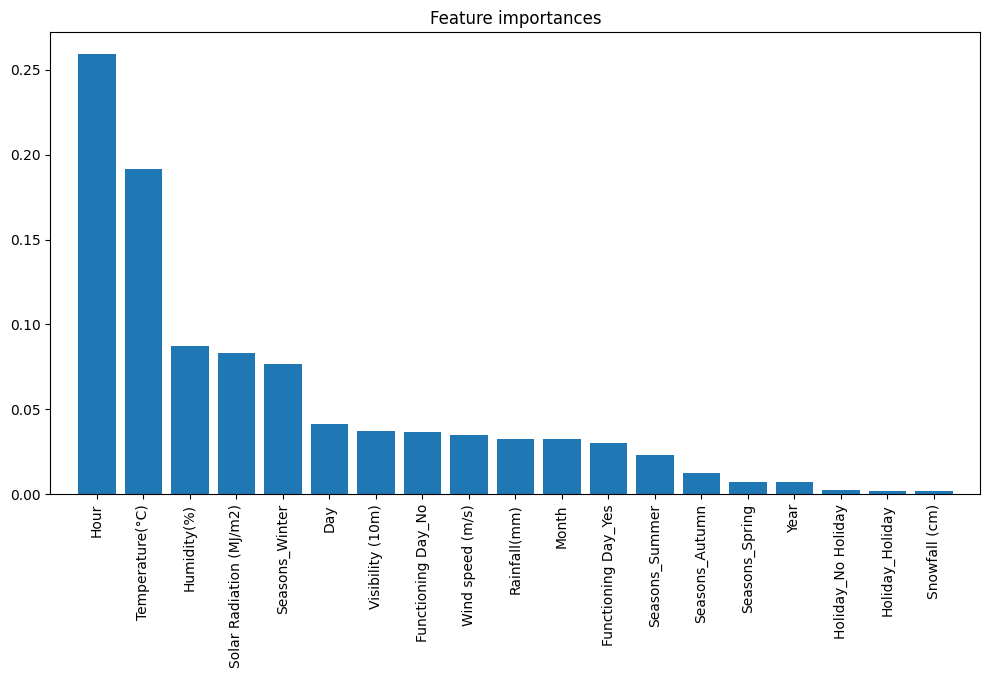

In [319]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Stampa delle feature importance
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")

# Visualizzazione delle feature importance
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

I use cross validation to test new the model

In [320]:
predictions = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Optimized Model Mean Absolute Error:", mae)
print("Optimized Model Mean Squared Error:", mse)
print("Optimized Model R² Score:", r2)

Optimized Model Mean Absolute Error: 139.64475964369763
Optimized Model Mean Squared Error: 51875.48316769425
Optimized Model R² Score: 0.8754927358686583


## Conclusions

Random Forest's model scored R² of 0.87 on the test set, indicating that it can explain 87% of the variability in the bicycle rental data. However, cross-validation showed significant variability in the scores R², with a mean of about 0.55 and a high standard deviation.
The discrepancy between the training error and the validation error suggests that the model may be subject to overfitting. 
This indicates that the model may not generalize well to new unseen data.